<a href="https://colab.research.google.com/github/Anjaliraha/Anjaliraha.github.io/blob/master/Lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
root_dir="/content/gdrive/My Drive/"
base_dir=root_dir + 'fastai-v3/fastai-1'

Mounted at /content/gdrive


In [4]:
from fastai import *
from fastai.vision import *

In [5]:
path=Path('/content/gdrive/My Drive/fastai-v3/pets/oxford-iiit-pet')
path

PosixPath('/content/gdrive/My Drive/fastai-v3/pets/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/pets/oxford-iiit-pet/annotations'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/pets/oxford-iiit-pet/images')]

In [7]:
path_anno=path/'annotations'
path_img=path/'images'

In [8]:
fnames=get_image_files(path_img)
fnames[:5]

[PosixPath('/content/gdrive/My Drive/fastai-v3/pets/oxford-iiit-pet/images/japanese_chin_134.jpg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/pets/oxford-iiit-pet/images/Maine_Coon_115.jpg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/pets/oxford-iiit-pet/images/japanese_chin_127.jpg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/pets/oxford-iiit-pet/images/Egyptian_Mau_23.jpg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/pets/oxford-iiit-pet/images/japanese_chin_84.jpg')]

In [9]:
np.random.seed(2)
pat= r'/([^/]+)_\d+.jpg$'

In [10]:
data=ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
japanese_chin,Maine_Coon,japanese_chin,great_pyrenees,pomeranian
Path: /content/gdrive/My Drive/fastai-v3/pets/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,english_setter,english_cocker_spaniel,beagle,samoyed
Path: /content/gdrive/My Drive/fastai-v3/pets/oxford-iiit-pet/images;

Test: None

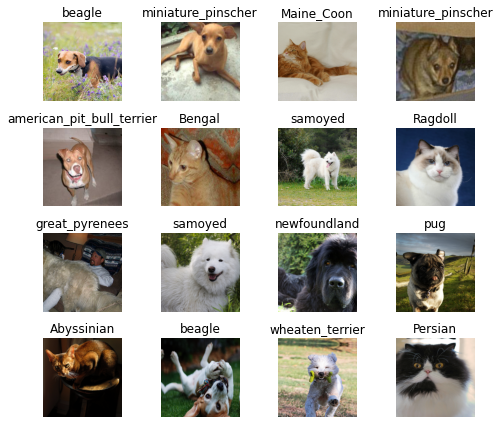

In [11]:
data.show_batch(rows=4,figsize=(7,6))

In [12]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [13]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.418559,0.374235,0.124493,01:48
1,0.621070,0.272158,0.092016,01:40
2,0.385941,0.241067,0.075778,01:39
3,0.287855,0.225798,0.073748,01:38


In [16]:
learn.save('stage-1')